In [2]:
import numpy as np

basesizes = [8, 16, 32, 64, 128, 256, 512, 1024]

paths_basesize_numerical = [
    'outputs_done/ablation/foundation_basesize_8/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_16/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_32/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_64/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_128/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_256/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_512/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-25/test-numerical-classification/dataset_plot_combined.npy'
]

paths_basesize_categorical = [
    'outputs_done/ablation/foundation_basesize_8/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_16/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_32/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_64/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_128/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_256/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_basesize_512/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-25/test-categorical-classification/dataset_plot_combined.npy'
]

depths = [1, 5, 9, 13, 17, 21, 25]

paths_depth_numerical = [
    'outputs_done/ablation/foundation_depth_1/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-5/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-9/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-13/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-17/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-21/test-numerical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-25/test-numerical-classification/dataset_plot_combined.npy'
]

paths_depth_categorical = [
    'outputs_done/ablation/foundation_depth_1/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-5/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-9/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-13/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-17/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-21/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/ablation/foundation_depth_1-25/test-categorical-classification/dataset_plot_combined.npy'
]



In [3]:
def get_data(path: str):

    data = np.load(path)

    f_mean = data[0, 7, 0]
    f_low = data[1, 7, 0]
    f_high = data[2, 7, 0]
    
    return f_mean, f_low, f_high

In [4]:
l = []

for path, basesize in zip(paths_basesize_numerical, basesizes):

    mean, cb_low, cb_high = get_data(path)

    l.append({
        'hyperparam': 'base size',
        'value': basesize,
        'feature': 'numerical',
        'mean': mean,
        'cb_low': cb_low,
        'cb_high': cb_high
    })

for path, basesize in zip(paths_basesize_categorical, basesizes):
    
    mean, cb_low, cb_high = get_data(path)

    l.append({
        'hyperparam': 'base size',
        'value': basesize,
        'feature': 'categorical',
        'mean': mean,
        'cb_low': cb_low,
        'cb_high': cb_high
    })

for path, depth in zip(paths_depth_numerical, depths):

    mean, cb_low, cb_high = get_data(path)

    l.append({
        'hyperparam': 'depth',
        'value': depth,
        'feature': 'numerical',
        'mean': mean,
        'cb_low': cb_low,
        'cb_high': cb_high
    })


for path, depth in zip(paths_depth_categorical, depths):

    mean, cb_low, cb_high = get_data(path)

    l.append({
        'hyperparam': 'depth',
        'value': depth,
        'feature': 'categorical',
        'mean': mean,
        'cb_low': cb_low,
        'cb_high': cb_high
    })

In [5]:
# The normalization function changed after the ablation study
# This is a quick fix to make the accuracies roughly inline with the other plots

for d in l:
    d['mean'] -= 0.05
    d['cb_low'] -= 0.05
    d['cb_high'] -= 0.05

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(l)

print(df)


   hyperparam  value      feature      mean    cb_low   cb_high
0   base size      8    numerical  0.707254  0.696210  0.719657
1   base size     16    numerical  0.742748  0.726859  0.756495
2   base size     32    numerical  0.771801  0.753341  0.788587
3   base size     64    numerical  0.804587  0.792973  0.816911
4   base size    128    numerical  0.780329  0.766411  0.795526
5   base size    256    numerical  0.791136  0.779893  0.800682
6   base size    512    numerical  0.765283  0.752000  0.777581
7   base size   1024    numerical  0.761173  0.746409  0.775436
8   base size      8  categorical  0.642548  0.543034  0.703696
9   base size     16  categorical  0.740673  0.714625  0.771639
10  base size     32  categorical  0.799224  0.776829  0.816641
11  base size     64  categorical  0.785241  0.763189  0.807014
12  base size    128  categorical  0.780739  0.712173  0.816659
13  base size    256  categorical  0.806173  0.784976  0.825238
14  base size    512  categorical  0.780

In [7]:
df[(df['hyperparam'] == 'base size') & (df['feature'] == 'numerical')]

,hyperparam,value,feature,mean,cb_low,cb_high
0,base size,8,numerical,0.707254,0.696210,0.719657
1,base size,16,numerical,0.742748,0.726859,0.756495
2,base size,32,numerical,0.771801,0.753341,0.788587
3,base size,64,numerical,0.804587,0.792973,0.816911
4,base size,128,numerical,0.780329,0.766411,0.795526
5,base size,256,numerical,0.791136,0.779893,0.800682
6,base size,512,numerical,0.765283,0.752000,0.777581
7,base size,1024,numerical,0.761173,0.746409,0.775436


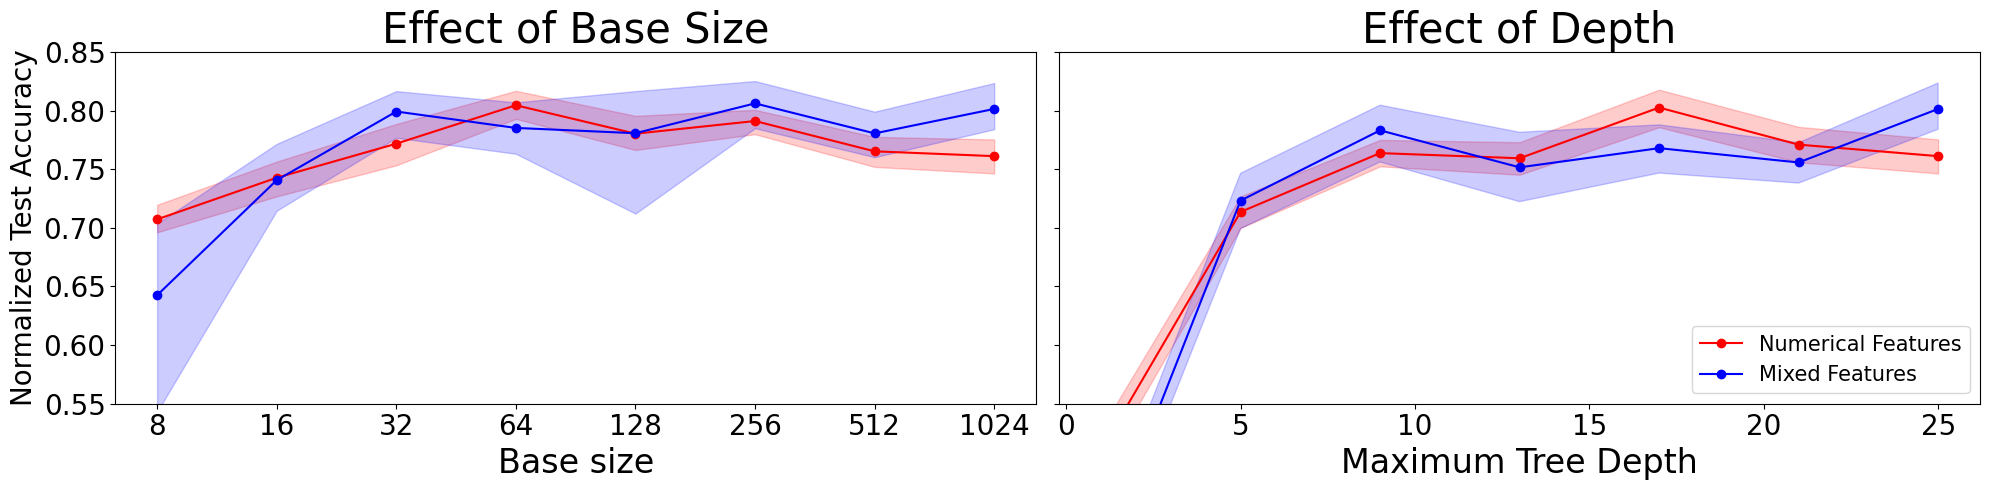

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

df_base_size_numerical = df[(df['hyperparam'] == 'base size') & (df['feature'] == 'numerical')]
df_base_size_categorical = df[(df['hyperparam'] == 'base size') & (df['feature'] == 'categorical')]
df_depth_numerical = df[(df['hyperparam'] == 'depth') & (df['feature'] == 'numerical')]
df_depth_categorical = df[(df['hyperparam'] == 'depth') & (df['feature'] == 'categorical')]

ax[0].plot(basesizes, df_base_size_numerical['mean'], label='base_size', marker='o', color='red')
ax[0].fill_between(basesizes, df_base_size_numerical['cb_low'], df_base_size_numerical['cb_high'], alpha=0.2, label='90% CI', color='red')
ax[0].plot(basesizes, df_base_size_categorical['mean'], label='base_size', marker='o', color='blue')
ax[0].fill_between(basesizes, df_base_size_categorical['cb_low'], df_base_size_categorical['cb_high'], alpha=0.2, label='90% CI', color='blue')

ax[0].set_xscale('log', base=2)
ax[0].set_xlabel('Base size', fontsize=24)
ax[0].set_ylabel('Normalized Test Accuracy', fontsize=20)
ax[0].xaxis.set_major_formatter(mticker.ScalarFormatter(), )
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[0].set_title('Effect of Base Size', fontsize=30)

ax[1].plot(depths, df_depth_numerical['mean'], label='depth', marker='o', color='red')
ax[1].fill_between(depths, df_depth_numerical['cb_low'], df_depth_numerical['cb_high'], alpha=0.2, label='90% CI', color='red')
ax[1].plot(depths, df_depth_categorical['mean'], label='depth', marker='o', color='blue')
ax[1].fill_between(depths, df_depth_categorical['cb_low'], df_depth_categorical['cb_high'], alpha=0.2, label='90% CI', color='blue')

ax[1].set_xlabel('Maximum Tree Depth', fontsize=24)
ax[1].set_title('Effect of Depth', fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=20)


ax[1].legend(loc='lower right', fontsize=15, handles=[plt.Line2D([0], [0], color='red', marker='o', label='Numerical Features'), plt.Line2D([0], [0], color='blue', marker='o', label='Mixed Features')])

plt.setp(ax, ylim=(0.55, 0.85))

fig.tight_layout()

In [9]:
fig.savefig('ablation.pdf')